In [1]:
import os

os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

import tensorflow as tf

In [2]:
# Create AlexNet Model

# Input Layer
inputs = tf.keras.Input(shape=(224, 224, 3), name="alexnet_input")

# Layer 1 - Convolutions
l1_g1 = tf.keras.layers.Conv2D(filters=48, kernel_size=11, strides=4, padding="same")(inputs)
l1_g1 = tf.keras.layers.BatchNormalization()(l1_g1)
l1_g1 = tf.keras.layers.ReLU()(l1_g1)
l1_g1 = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)(l1_g1)

l1_g2 = tf.keras.layers.Conv2D(filters=48, kernel_size=11, strides=4, padding="same")(inputs)
l1_g2 = tf.keras.layers.BatchNormalization()(l1_g2)
l1_g2 = tf.keras.layers.ReLU()(l1_g2)
l1_g2 = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)(l1_g2)

# Layer 2 - Convolutions
l2_g1 = tf.keras.layers.Conv2D(filters=128, kernel_size=5, strides=1, padding="same")(l1_g1)
l2_g1 = tf.keras.layers.BatchNormalization()(l2_g1)
l2_g1 = tf.keras.layers.ReLU()(l2_g1)
l2_g1 = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)(l2_g1)

l2_g2 = tf.keras.layers.Conv2D(filters=128, kernel_size=5, strides=1, padding="same")(l1_g2)
l2_g2 = tf.keras.layers.BatchNormalization()(l2_g2)
l2_g2 = tf.keras.layers.ReLU()(l2_g2)
l2_g2 = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)(l2_g2)

# Layer 3 - Convolutions
l3_concat = tf.keras.layers.concatenate([l2_g1, l2_g2], axis=-1)

l3_g1 = tf.keras.layers.Conv2D(filters=192, kernel_size=3, strides=1, padding="same")(l3_concat)
l3_g1 = tf.keras.layers.ReLU()(l3_g1)

l3_g2 = tf.keras.layers.Conv2D(filters=192, kernel_size=3, strides=1, padding="same")(l3_concat)
l3_g2 = tf.keras.layers.ReLU()(l3_g2)

# Layer 4 - Convolutions
l4_g1 = tf.keras.layers.Conv2D(filters=192, kernel_size=3, strides=1, padding="same")(l3_g1)
l4_g1 = tf.keras.layers.ReLU()(l4_g1)

l4_g2 = tf.keras.layers.Conv2D(filters=192, kernel_size=3, strides=1, padding="same")(l3_g2)
l4_g2 = tf.keras.layers.ReLU()(l4_g2)

# Layer 5 - Convolutions
l5_g1 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same")(l4_g1)
l5_g1 = tf.keras.layers.ReLU()(l5_g1)
l5_g1 = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)(l5_g1)

l5_g2 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same")(l4_g2)
l5_g2 = tf.keras.layers.ReLU()(l5_g2)
l5_g2 = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2)(l5_g2)

# Layer 6 - Dense
l6_pre = tf.keras.layers.concatenate([l5_g1, l5_g2], axis=-1)
l6_pre = tf.keras.layers.Flatten()(l6_pre)

l6 = tf.keras.layers.Dense(units=4096)(l6_pre)
l6 = tf.keras.layers.ReLU()(l6)
l6 = tf.keras.layers.Dropout(rate=0.5)(l6)

# Layer 7 - Dense
l7 = tf.keras.layers.Dense(units=4096)(l6)
l7 = tf.keras.layers.ReLU()(l7)
l7 = tf.keras.layers.Dropout(rate=0.5)(l7)

# Layer 8 - Dense
l8 = tf.keras.layers.Dense(units=1000)(l7)
l8 = tf.keras.layers.Softmax(dtype=tf.float32, name="alexnet_output")(l8)

alexnet = tf.keras.models.Model(inputs=inputs, outputs=l8)

In [3]:
alexnet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
alexnet_input (InputLayer)      [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 56, 56, 48)   17472       alexnet_input[0][0]              
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 56, 56, 48)   17472       alexnet_input[0][0]              
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 56, 56, 48)   192         conv2d[0][0]                     
______________________________________________________________________________________________

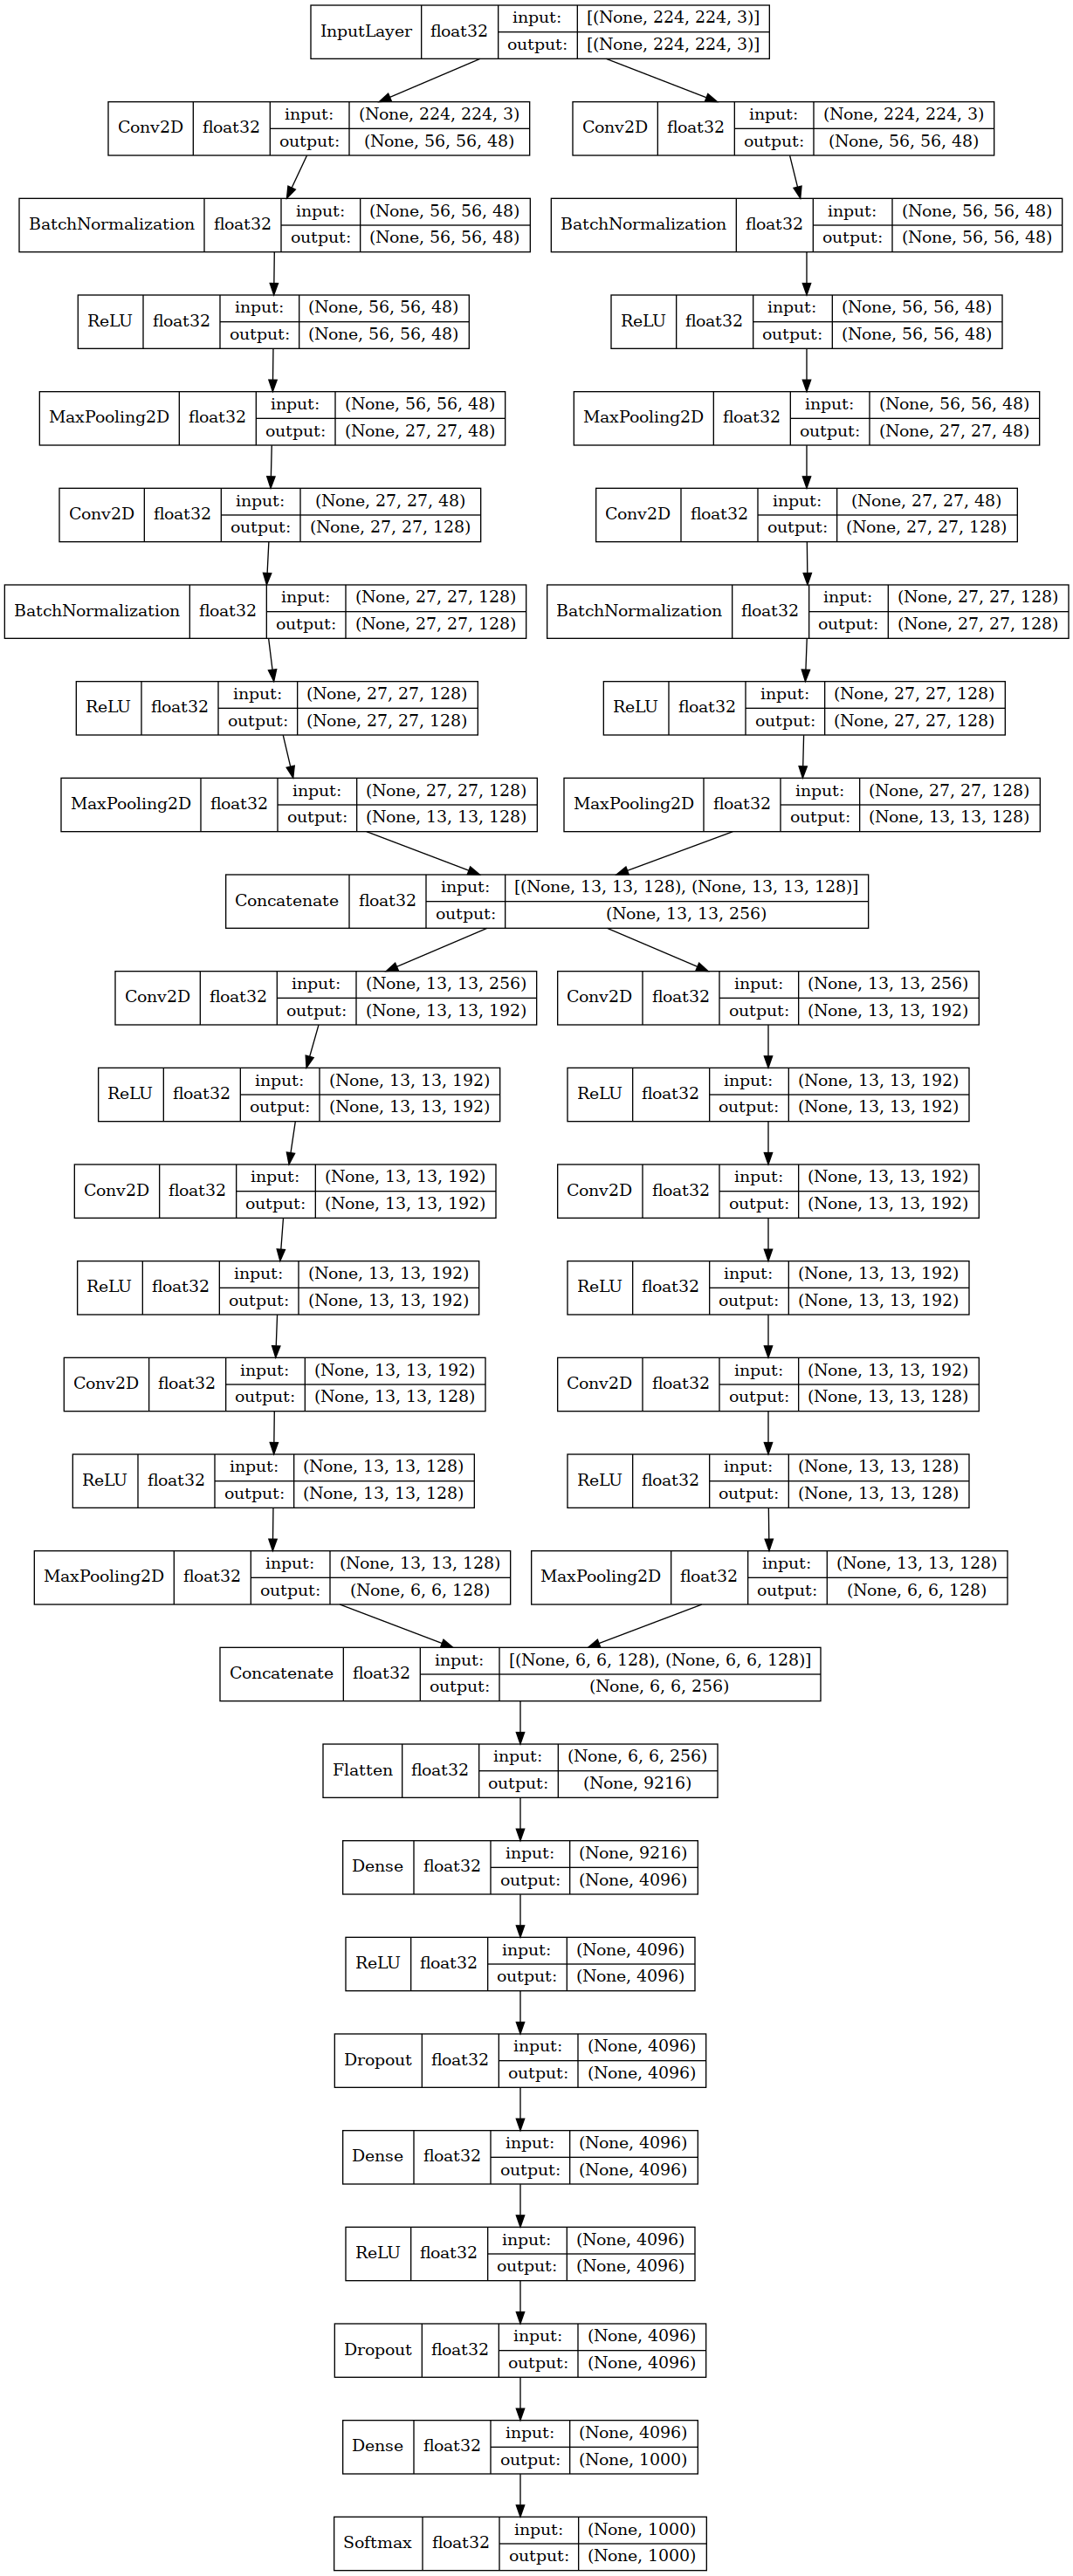

In [4]:
tf.keras.utils.plot_model(alexnet, show_layer_names=False, show_shapes=True, show_dtype=True)